In [1]:
#!pip3 install plotly
#!pip3 install matplotlib
#!pip3 install pandas_profiling

# Data Analytics and Algorithms

#### Name: Rajas Bakshi      
#### Student Number: C00265741

### Problem Statement

The company wants to hire data scientists among the people who have completed the course offered by the company. Thus the company wants to know which of the candidates enrolled for the course are looking for the job. It will help the company in reducing the time and cost of categorizing the candidates. The data set is the collection of factors that leads a person to leave the current job. The developed model(s) is to predict whether the candidate is looking for a new job or will work with the current employer. 

#### Dataset
The dataset is an imbalanced dataset, with most of the features being categorical. The data set has ~20,000 observations. The description of all the features in the data is as below. 

**Features**
* enrollee_id : Unique ID for candidate
* city: City code
* city_ development _index : Developement index of the city (scaled)
* gender: Gender of candidate
* relevent_experience: Relevant experience of candidate
* enrolled_university: Type of University course enrolled if any
* education_level: Education level of candidate
* major_discipline :Education major discipline of candidate
* experience: Candidate total experience in years
* company_size: No of employees in current employer's company
* company_type : Type of current employer
* lastnewjob: Difference in years between previous job and current job
* training_hours: training hours completed
* target: 0 – Not looking for job change, 1 – Looking for a job change

The dataset is an open-source dataset from Kaggle and can be found on this [link](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)

##### The Html version of this notebook can be found on the link below. 

https://rajas-bakshi.github.io/HR_Analysis/

##### GitHub repository:

https://github.com/Rajas-Bakshi/HR_Analysis

##### Logbook can be found on the link below:

https://github.com/Rajas-Bakshi/HR_Analysis/blob/main/LogBook.pdf

##### Screencast can be found on the link below:

https://instituteoftechnol663-my.sharepoint.com/:v:/g/personal/c00265741_itcarlow_ie/EaFipfJ2bBFNnMU6U0LLUE8Bqh2K0mQVk2bSlPVCj7hw4A?e=BP3noc

##### Requirements for CONDA environment can be found on the link below:

https://github.com/Rajas-Bakshi/HR_Analysis/blob/main/requirements.txt

## Importing essential libraries


In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

import plotly

from sklearn.model_selection import train_test_split
import cudf
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

import os


plotly.offline.init_notebook_mode(connected=True)
sns.set_theme(style="darkgrid")


## Importing the dataset and creating the profiling report. 
This report will help in getting high-level insights into the data. 

In [3]:
data = pd.read_csv("aug_data.csv")

profile = ProfileReport(data, title="Pandas Profiling Report"
                        ,explorative=True
                        #,samples=None
                        #,correlations=None
                        #,missing_diagrams=None
                        #,duplicates=None
                        #,interactions=None
                       )
profile.to_file("profile.html")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### This DataFrame profile can be found on this [link](https://rajas-bakshi.github.io/HR_Analysis/profile.html)

### Converting the panda's dataframe to Cuda's dataframe


**Why cuda's data frame?**

CuDF is a python dataframe package similar to pandas. CuDF is a piece of technology from the NVIDIA rapids package. However, unlike pandas, CuDF is a GPU-enabled library. Moving towards GPU gives us massive acceleration as GPU has more cores than the CPU.

For using NVIDIA rapids, the prerequisites are.
* GPU
* CUDA& NVIDIA toolkit

more information on the installation can be found [here](https://rapids.ai/start.html)

In [4]:
data = cudf.from_pandas(data)
type(data)

cudf.core.dataframe.DataFrame

In [5]:
data.dropna().shape

(8955, 14)

In [6]:
data.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   enrollee_id             19158 non-null  int64
 1   city                    19158 non-null  object
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object
 4   relevent_experience     19158 non-null  object
 5   enrolled_university     18772 non-null  object
 6   education_level         18698 non-null  object
 7   major_discipline        16345 non-null  object
 8   experience              19093 non-null  object
 9   company_size            13220 non-null  object
 10  company_type            13018 non-null  object
 11  last_new_job            18735 non-null  object
 12  training_hours          19158 non-null  int64
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
memory usage: 2.6+

In [7]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,<NA>,<NA>,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,<NA>,No relevent experience,Full time course,Graduate,STEM,5,<NA>,<NA>,never,83,0.0
3,33241,city_115,0.789,<NA>,No relevent experience,<NA>,Graduate,Business Degree,<1,<NA>,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### Taking care of null values

In [8]:
data.dropna().shape

(8955, 14)

#### As we see in the report, there are 20.733 missing cells.  If we drop all the rows with one empty value, we will only be left with 8955 rows

#### To avoid this, as Gender and company type have missing values above 20%, we drop those columns.The Company size also has missing values of more than 20%, but it is a Numeric variable, and we can do something to replace its missing values.

#### Also, the employee ID is unique and will not help our classification thus; we drop it as well.

In [9]:
data = data.drop(["enrollee_id", "gender", "city", "company_type"], axis = 1 )

After dropping the above mentioned clumns we drop the rows where the missing values are less than 20%

In [10]:
data = data.dropna(subset= ["enrolled_university","education_level", "experience", "last_new_job"])
data.shape

(18014, 10)

#### Now we are left with the dataframe of dimension 18014 x 10, which is much better than dropping entire rows with null values.

### Let us see the number of null values in the dataframe. 

In [11]:
data.isna().sum()

city_development_index       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline          2222
experience                   0
company_size              5310
last_new_job                 0
training_hours               0
target                       0
dtype: uint64

In [12]:
data.company_size.value_counts()

50-99        2950
100-500      2483
10000+       1964
10/49        1394
1000-4999    1282
<10          1242
500-999       847
5000-9999     542
Name: company_size, dtype: int32

#### The columns now left with null values are "company_size" and "major_discipline."

After looking at the "company_size" column's unique values, we can see many symbols that need to be taken care.

* If the company size has "< " we reduce the current value by 1.
* If the company size has ">" we increment the current value by 1. 
* If the company size has "-" or "/" we split the string by the symbol and calculate the average and replace it with the cell's value. 

In [13]:
data.company_size = data.to_pandas().company_size.apply(lambda x: int(str(x).replace("<", "")) - 1 
                        if (str(x).find("<")  > -1)
                            else int(str(x).replace("+", "")) + 1 
                        if (str(x).find("+") > -1) 
                        else str(x).split("-") 
                        if (str(x).find("-") > -1) 
                        else str(x).split("/") 
                        if (str(x).find("/") > -1) 
                        else x).apply(lambda x: (int(x[0]) + int(x[1]))/2 if (type(x) == list) else x)


In [14]:
#data.company_size = data.company_size.apply(lambda x: (int(x[0]) + int(x[1]))/2 if (type(x) == list) else x)

data.company_size.value_counts()

74.5       2950
300.0      2483
10001.0    1964
29.5       1394
2999.5     1282
9.0        1242
749.5       847
7499.5      542
Name: company_size, dtype: int32

In [15]:
data.company_size = data.company_size.fillna(round(data.company_size.mean(), 2))

### Now After filling null values in company_size lets take care of major_discipline

#### Let us first see how does "major_discipline" column affects the target. 

In [16]:
data = data.to_pandas()
data_temp_1 = data[["major_discipline", "target"]].groupby(["major_discipline"])
group_keys = list(data_temp_1.groups.keys())
Flag = False

for _, group in data_temp_1:
        total_in_major = group.count()[0]
        if Flag == True:
            calculations = calculations.join(group.groupby("target").count() * 100 / total_in_major,how= 'outer', lsuffix='_left', rsuffix='_right')
        else:
            Flag = True
            calculations = group.groupby("target").count() * 100 / total_in_major
            

calculations.columns = group_keys   
calculations = pd.melt(calculations.reset_index(),value_vars=group_keys,  id_vars=["target"])


In [17]:
px.bar(calculations, x = "variable", y ="value", color = "target")

#### Thus after evaluating the probablity of looking for new job fom each major. No group of major seams to have significantly high probablity. 

#### Thus, we decide to drop this column. 

In [18]:
data = data.drop("major_discipline", axis = 1)
data.isna().sum()

city_development_index    0
relevent_experience       0
enrolled_university       0
education_level           0
experience                0
company_size              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

### Now we have no null values in the dataset. Now before performing EDA lets us take one look at the dataset

In [19]:
data.head(5)

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target
0,0.920,Has relevent experience,no_enrollment,Graduate,>20,2298.79,1,36,1.0
1,0.776,No relevent experience,no_enrollment,Graduate,15,74.50,>4,47,0.0
2,0.624,No relevent experience,Full time course,Graduate,5,2298.79,never,83,0.0
4,0.767,Has relevent experience,no_enrollment,Masters,>20,74.50,4,8,0.0
5,0.764,Has relevent experience,Part time course,Graduate,11,2298.79,1,24,1.0


#### The data in "experience" and "last_new_job" has some signs like ">" let us have a look at what all such characters are in these columns.

In [20]:
data.experience.value_counts()

>20    3182
5      1337
4      1298
3      1223
6      1143
2       997
7       982
10      946
9       936
8       768
15      668
11      649
14      569
16      488
12      475
1       475
<1      451
13      387
17      331
19      294
18      273
20      142
Name: experience, dtype: int64

In [21]:
data.last_new_job.value_counts()

1        7789
>4       3210
2        2827
never    2187
4        1010
3         991
Name: last_new_job, dtype: int64

#### Thus getting rid of these characters and decrementing and increasing the values as per the sign. Also, replacing "Never" with 0

In [22]:
import warnings
warnings.filterwarnings('ignore')

data.experience = data.experience.apply(lambda x: int(x.replace("<", "")) - 1 if (x.find("<") > -1) else 
                                       x.replace(">", "") if (x.find(">") > - 1) else x)

data.last_new_job = data.last_new_job.apply(lambda x: int(x.replace("<", "")) - 1 if (x.find("<") > -1) else 
                                       x.replace(">", "") if (x.find(">") > - 1) else x)

data.last_new_job[data.last_new_job == "never"] = 0;


#### Now taking the final look at the dataframe

In [23]:
data.head(10)

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target
0,0.920,Has relevent experience,no_enrollment,Graduate,20,2298.79,1,36,1.0
1,0.776,No relevent experience,no_enrollment,Graduate,15,74.50,4,47,0.0
2,0.624,No relevent experience,Full time course,Graduate,5,2298.79,0,83,0.0
4,0.767,Has relevent experience,no_enrollment,Masters,20,74.50,4,8,0.0
5,0.764,Has relevent experience,Part time course,Graduate,11,2298.79,1,24,1.0
6,0.920,Has relevent experience,no_enrollment,High School,5,74.50,1,24,0.0
7,0.762,Has relevent experience,no_enrollment,Graduate,13,9.00,4,18,1.0
8,0.920,Has relevent experience,no_enrollment,Graduate,7,74.50,1,46,1.0
9,0.920,Has relevent experience,no_enrollment,Graduate,17,10001.00,4,123,0.0
10,0.624,No relevent experience,Full time course,High School,2,2298.79,0,32,1.0


#### We can see six numeric columns, and now let us see how many numeric columns have python detected.

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18014 entries, 0 to 19157
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  18014 non-null  float64
 1   relevent_experience     18014 non-null  object 
 2   enrolled_university     18014 non-null  object 
 3   education_level         18014 non-null  object 
 4   experience              18014 non-null  object 
 5   company_size            18014 non-null  float64
 6   last_new_job            18014 non-null  object 
 7   training_hours          18014 non-null  int64  
 8   target                  18014 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.4+ MB


#### Python has not detected "experience" and "last_new_job" as numeric, converting data for these two columns. 

In [25]:
data.experience = pd.to_numeric(data.experience)
data.last_new_job = pd.to_numeric(data.last_new_job)


## Performing EDA to understand the relationship between data.

### Plotting the relation between "relevent_experience" and "target". 


In [26]:

data_temp_1 = data[["relevent_experience", "target"]].groupby(["relevent_experience"])
group_keys = list(data_temp_1.groups.keys())
Flag = False

for _, group in data_temp_1:
        total_in_major = group.count()[0]
        if Flag == True:
            calculations = calculations.join(group.groupby("target").count() * 100 / total_in_major,how= 'outer', lsuffix='_left', rsuffix='_right')
        else:
            Flag = True
            calculations = group.groupby("target").count() * 100 / total_in_major
            

calculations.columns = group_keys   
calculations = pd.melt(calculations.reset_index(),value_vars=group_keys,  id_vars=["target"])
#px.bar(calculations, x = "variable", y ="value", color = "target")
calculations.target[calculations.target == 0] = " Not looking for job change and "
calculations.target[calculations.target == 1] = " Looking for job change and "
calculations["Labels"] = calculations.target + calculations.variable
calculations = calculations.sort_values(by = "value")

In [27]:
px.pie (calculations, names = "Labels", values = "value", hole = 0.7, opacity=0.9)

#### It can be seen out of total about 27% people are looking for a job change and out of the 27% about 17% have No relevant experience

### Understanding the relationship between city_development_index and target.

In [28]:
px.histogram(data, x="city_development_index", marginal="violin")

#### The histogram can be seen skewed to the right. The density of the data is between 0.9 - 0.95.

#### Plotting the relation between "city_development_index" and "target". 


In [29]:
data_temp_1 = data[["city_development_index", "target"]].groupby(["city_development_index"])
group_keys = list(data_temp_1.groups.keys())
Flag = False

for _, group in data_temp_1:
        total_in_major = group.count()[0]
        if Flag == True:
            calculations = calculations.join(group.groupby("target").count() * 100 / total_in_major,how= 'outer', lsuffix='_left', rsuffix='_right')
        else:
            Flag = True
            calculations = group.groupby("target").count() * 100 / total_in_major
            

calculations.columns = group_keys   
calculations = pd.melt(calculations.reset_index(),value_vars=group_keys,  id_vars=["target"])
calculations.columns = ["target", "city_development_index",  "P"]
calculations_city = calculations

In [30]:
px.scatter_3d(calculations, x ="city_development_index", y = "P", z = "target", color = "target", symbol= "target")

#### The above 3D graph is giving good information about the relation between the city index value and target. By looking at this graph, we can see that the "city_development_index" has roughly four groups.

### Plotting the relation between "enrolled_university" and "target". 


In [31]:
data_temp_1 = data[["enrolled_university", "target"]].groupby(["enrolled_university"])
group_keys = list(data_temp_1.groups.keys())
Flag = False

for _, group in data_temp_1:
        total_in_major = group.count()[0]
        if Flag == True:
            calculations = calculations.join(group.groupby("target").count() * 100 / total_in_major,how= 'outer', lsuffix='_left', rsuffix='_right')
        else:
            Flag = True
            calculations = group.groupby("target").count() * 100 / total_in_major
            

calculations.columns = group_keys   
calculations = pd.melt(calculations.reset_index(),value_vars=group_keys,  id_vars=["target"])
calculations.target = calculations.target.astype(str)
calculations.columns = ["target", "enrolled_university", "value"]

<AxesSubplot:xlabel='enrolled_university', ylabel='value'>

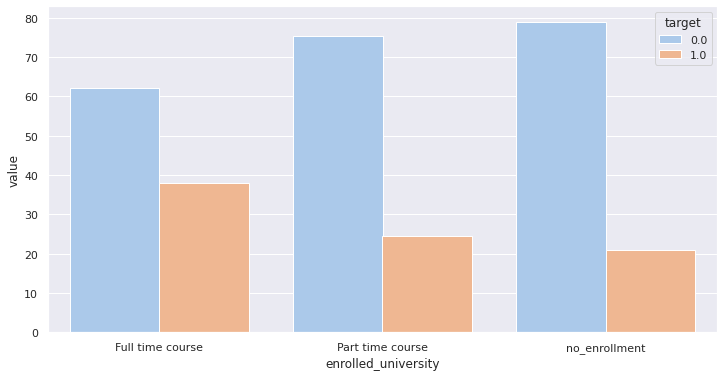

In [32]:
plt.figure(figsize=(12, 6))

sns.barplot (data = calculations, x="enrolled_university", y="value",
             hue='target', palette= "pastel")

#px.bar(calculations, x = 'enrolled_university', y = "value", color = "target", barmode='group')

#### This is in the bar graph above we can see that people with the full-time course are more inclined to find a new job.

### Plotting the relation between "education_level" and "target". 



In [33]:
data_temp_1 = data[["education_level", "target"]].groupby(["education_level"])
group_keys = list(data_temp_1.groups.keys())
Flag = False

for _, group in data_temp_1:
        total_in_major = group.count()[0]
        if Flag == True:
            calculations = calculations.join(group.groupby("target").count() * 100 / total_in_major,how= 'outer', lsuffix='_left', rsuffix='_right')
        else:
            Flag = True
            calculations = group.groupby("target").count() * 100 / total_in_major
            

calculations.columns = group_keys   
calculations = pd.melt(calculations.reset_index(),value_vars=group_keys,  id_vars=["target"])
calculations.target = calculations.target.astype(str)
calculations.columns = ["target", "education_level", "value"]

In [34]:
fig = px.line_polar(calculations, r='value', theta='education_level', color= "target", line_close=True)
fig.show()

#### Thus we can see that the graduates are more inclined towards finding a new job.

### Plotting the relation between "last_new_job" and "target". 


In [35]:
data_temp_1 = data[["last_new_job", "target"]].groupby(["last_new_job"])
group_keys = list(data_temp_1.groups.keys())
Flag = False

for _, group in data_temp_1:
        total_in_major = group.count()[0]
        if Flag == True:
            calculations = calculations.join(group[["last_new_job", "target"]].groupby("target").count() * 100 / total_in_major,how= 'outer', lsuffix='_left', rsuffix='_right')
        else:
            Flag = True
            calculations = group[["last_new_job", "target"]].groupby("target").count() * 100 / total_in_major
            

calculations.columns = group_keys   
calculations = pd.melt(calculations.reset_index(),value_vars=group_keys,  id_vars=["target"])
calculations.target = calculations.target.astype(str)
calculations.columns = ["target", "last_new_job", "value"]

In [36]:
fig = px.bar(calculations, x="last_new_job", y="value",
             color='target')
fig.show()

#### In the above graph, it can be that as the value of "last_new_job" increases, the probability of candidates finding a new job reduces. 

### Plotting the relation between "experience" and "target". 


In [37]:
data_temp_1 = data[["experience", "target"]].groupby(["experience"])
group_keys = list(data_temp_1.groups.keys())
Flag = False

for _, group in data_temp_1:
        total_in_major = group.count()[0]
        if Flag == True:
            calculations = calculations.join(group[["experience", "target"]].groupby("target").count() * 100 / total_in_major,how= 'outer', lsuffix='_left', rsuffix='_right')
        else:
            Flag = True
            calculations = group[["experience", "target"]].groupby("target").count() * 100 / total_in_major
            

calculations.columns = group_keys   
calculations = pd.melt(calculations.reset_index(),value_vars=group_keys,  id_vars=["target"])
calculations.target = calculations.target.astype(str)
calculations.columns = ["target", "experience", "value"]

<AxesSubplot:xlabel='experience', ylabel='value'>

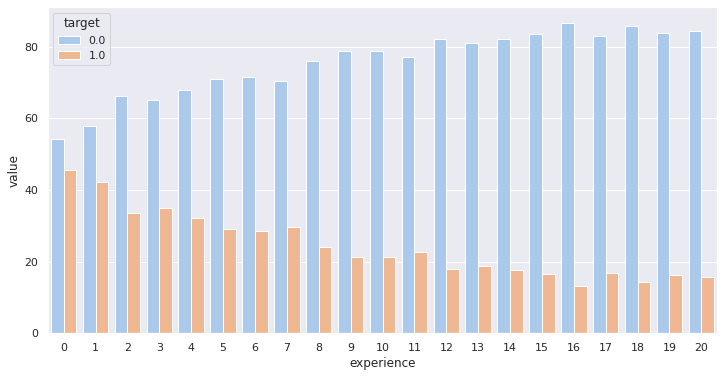

In [38]:
plt.figure(figsize=(12, 6))

sns.barplot (data = calculations, x="experience", y="value",
             hue='target', palette= "pastel")


#### The above graph shows the people with less experience are tend to not look for the job change. 

### Plotting the relation between "company_size" and "target". 


In [39]:
data_temp_1 = data[["company_size", "target"]].groupby(["company_size"])
group_keys = list(data_temp_1.groups.keys())
Flag = False

for _, group in data_temp_1:
        total_in_major = group.count()[0]
        if Flag == True:
            calculations = calculations.join(group[["company_size", "target"]].groupby("target").count() * 100 / total_in_major,how= 'outer', lsuffix='_left', rsuffix='_right')
        else:
            Flag = True
            calculations = group[["company_size", "target"]].groupby("target").count() * 100 / total_in_major
            

calculations.columns = group_keys   
calculations = pd.melt(calculations.reset_index(),value_vars=group_keys,  id_vars=["target"])
calculations.target = calculations.target.astype(str)
calculations.columns = ["target", "company_size", "value"]

In [40]:
fig = px.scatter(calculations, y='value', x='company_size', color= "target",log_x=True)
fig.show()

#### No Significant relation can be seen in between "company_size" and "Target".

### Plotting the relation between "training_hours" and "target". 


In [41]:
data_temp_1 = data[["training_hours", "target"]].groupby(["training_hours"])
group_keys = list(data_temp_1.groups.keys())
Flag = False

for _, group in data_temp_1:
        total_in_major = group.count()[0]
        if Flag == True:
            calculations = calculations.join(group[["training_hours", "target"]].groupby("target").count() * 100 / total_in_major,how= 'outer', lsuffix='_left', rsuffix='_right')
        else:
            Flag = True
            calculations = group[["training_hours", "target"]].groupby("target").count() * 100 / total_in_major
            

calculations.columns = group_keys   
calculations = pd.melt(calculations.reset_index(),value_vars=group_keys,  id_vars=["target"])
calculations.target = calculations.target.astype(str)
calculations.columns = ["target", "training_hours", "value"]

In [42]:
plt.figure(figsize=(12, 6))

fig = px.scatter(calculations, y='value', x='training_hours', color= "target")
fig.show()


<Figure size 864x432 with 0 Axes>

#### The graph shows that people training for long hours are more interested in a new job. 

### Calculating correlation within features. 

In [43]:
data.corr()

,city_development_index,experience,company_size,last_new_job,training_hours,target
city_development_index,1.000000,0.330767,0.050122,0.190032,0.002648,-0.336234
experience,0.330767,1.000000,0.061383,0.464390,0.002272,-0.178688
company_size,0.050122,0.061383,1.000000,0.060451,-0.011089,0.006292
last_new_job,0.190032,0.464390,0.060451,1.000000,-0.002812,-0.085877
training_hours,0.002648,0.002272,-0.011089,-0.002812,1.000000,-0.022424
target,-0.336234,-0.178688,0.006292,-0.085877,-0.022424,1.000000


#### Now, as "training_hours" has a low correlation score, we drop it from the dataset and rearranging the dataset.

In [44]:
data = data[['city_development_index', 'relevent_experience', 'enrolled_university',
       'education_level', 'experience', 'company_size', 'last_new_job', 'target']]

## Machine learning

### Splitting the data into training and testing sets. 

In [45]:
data_1= data
x_data = data_1.iloc[:, :-1]
y_data = data_1.iloc[:, -1]
x_train, x_test, y_train, y_test =  train_test_split(x_data, y_data, train_size = 0.90, random_state = 0)

#### Since we have these three categorical columns, "relevent_experience", "enrolled_university",  "education_level" thus we One-Hot-Encode the data. 

In [46]:
one = OneHotEncoder()
col_trans = make_column_transformer((one, ["relevent_experience","enrolled_university", "education_level"]),
                                   remainder = "passthrough")

#### The dataset might have some more features that are not very helpful in classifying the data. So we use dimensionality reduction on auto mode to take care of such features. 

In [47]:
pca = PCA(n_components = 'mle', svd_solver = 'full')

### We will use several classifiers and finally select the classifier with the best performance parameters. 

### First, we start with the bagging classifier Random Forest Classifier. 

#### We create a pipeline of label encoding -> PCA -> Random Forest.


In [48]:
random_forest = RandomForestClassifier(n_estimators= 50)

pipe = Pipeline([('label', col_trans), ('pca', pca),("rf", random_forest)])

pipe.fit(x_train, y_train)

Pipeline(steps=[('label',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['relevent_experience',
                                                   'enrolled_university',
                                                   'education_level'])])),
                ('pca', PCA(n_components='mle', svd_solver='full')),
                ('rf', RandomForestClassifier(n_estimators=50))])

#### Once the model is trained on the data, we evaluate the model by calculating the training score and confusion matrix on the training data. 

In [49]:
print("train score: ", pipe.score(x_train, y_train))
y_pred  = pipe.predict(x_train)
print("-------------------")
print(confusion_matrix(y_train, y_pred))

train score:  0.9279546015297311
-------------------
[[11633   584]
 [  584  3411]]


#### The accuracy and the confusion matrix for the model looks good. It looks like the model has learned the data well. However, it is too soon to say that this model is the best.

#### Thus we first use k-fold cross-validation to ensure that the model is generalizing the data well. Moreover, we evaluate this model by calculating the mean of accuracy and standard deviation of the accuracy. 


In [50]:
accuracies = cross_val_score(estimator = pipe, X = x_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 76.30 %
Standard Deviation: 0.53 %


#### We can see here the accuracy has gone down but has low bias after performing cross-validation. So now, let us plot the ROC and calculate AUC for this model.  

In [51]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 

 

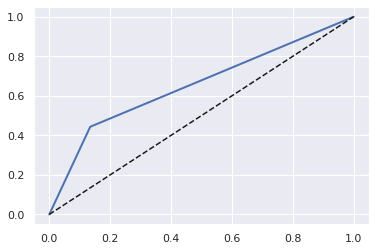

AUC Score:  0.6544096978880964


In [52]:
y_scores = cross_val_predict(pipe, x_train, y_train, cv=3,method="predict")

fpr, tpr, thresholds = roc_curve(y_train, y_scores)
plot_roc_curve(fpr, tpr)
plt.show()

print("AUC Score: ", roc_auc_score(y_train, y_scores))

#### We can see that the AOC score is not impressive neither the roc curve. Let us try other models. 

### GAUSSIAN NAIVE BAYES

#### Training Gaussian Naive Basie


In [53]:
from sklearn.naive_bayes import GaussianNB

Gaussian_nb = GaussianNB()
pipe = Pipeline([('label', col_trans), ('pca', pca), ("GaussianNB", Gaussian_nb)])
pipe.fit(x_train, y_train)

Pipeline(steps=[('label',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['relevent_experience',
                                                   'enrolled_university',
                                                   'education_level'])])),
                ('pca', PCA(n_components='mle', svd_solver='full')),
                ('GaussianNB', GaussianNB())])

#### Evaluating the model by calculating the training score and confusion matrix. 

In [54]:
print("train score: ", pipe.score(x_train, y_train))
y_pred  = pipe.predict(x_train)
print("-------------------")
print(confusion_matrix(y_train, y_pred))

train score:  0.763631877621515
-------------------
[[10619  1598]
 [ 2234  1761]]


#### Performing Cross-validation and evaluating the model. 


In [55]:
accuracies = cross_val_score(estimator = pipe, X = x_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 76.15 %
Standard Deviation: 0.65 %


#### Plotting ROC curve and calculating AUC.


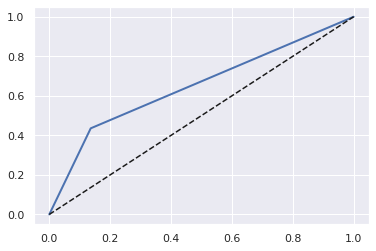

AUC Score:  0.6497113165214397


In [56]:
y_scores = cross_val_predict(pipe, x_train, y_train, cv=3,method="predict")

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

plot_roc_curve(fpr, tpr)
plt.show()

print("AUC Score: ", roc_auc_score(y_train, y_scores))

#### AOC score is not impressive neither the roc curve. Let us try other models.

## AdaBoostClassifier

#### Training AdaBoostClassifier

In [57]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
 DecisionTreeClassifier(max_depth=10), n_estimators=100,
 algorithm="SAMME.R", learning_rate=0.10)

pipe = Pipeline([('label', col_trans), ('pca', pca),("ADAbost", ada_clf)])
pipe.fit(x_train, y_train)


Pipeline(steps=[('label',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['relevent_experience',
                                                   'enrolled_university',
                                                   'education_level'])])),
                ('pca', PCA(n_components='mle', svd_solver='full')),
                ('ADAbost',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                                    learning_rate=0.1, n_estimators=100))])

#### We are evaluating the model by calculating the training score and confusion matrix. 

In [58]:
print("train score: ", pipe.score(x_train, y_train))
y_pred  = pipe.predict(x_train)
print("-------------------")
print(confusion_matrix(y_train, y_pred))

train score:  0.9282630150505798
-------------------
[[11588   629]
 [  534  3461]]


#### Performing Cross-validation and evaluating the model. 


In [59]:
accuracies = cross_val_score(estimator = pipe, X = x_train, y = y_train, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 75.62 %
Standard Deviation: 0.33 %


#### Plotting ROC curve and calculating AUC.

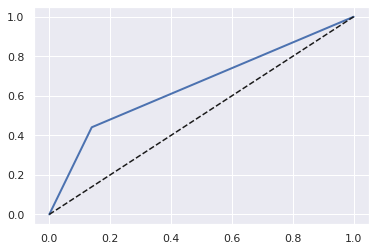

AUC Score:  0.6506616121916331


In [60]:
y_scores = cross_val_predict(pipe, x_train, y_train, cv=3,method="predict")

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

plot_roc_curve(fpr, tpr)
plt.show()

print("AUC Score: ", roc_auc_score(y_train, y_scores))

## SUPPORT VECTOR CLASSIFIER

#### Training Support Vector Classifier


In [61]:
from sklearn.svm import SVC

SVC_classifier = SVC()
pipe = Pipeline([('label', col_trans), ('pca', pca),("SVC", SVC_classifier)])
pipe.fit(x_train, y_train)


Pipeline(steps=[('label',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['relevent_experience',
                                                   'enrolled_university',
                                                   'education_level'])])),
                ('pca', PCA(n_components='mle', svd_solver='full')),
                ('SVC', SVC())])

#### We are evaluating the model by calculating the training score and confusion matrix. 

In [62]:
print("train score: ", pipe.score(x_train, y_train))
y_pred  = pipe.predict(x_train)
print("-------------------")

print(confusion_matrix(y_train, y_pred))

train score:  0.7535775968418456
-------------------
[[12217     0]
 [ 3995     0]]


#### Performing Cross-validation and evaluating the model. 


In [63]:
accuracies = cross_val_score(estimator = pipe, X = x_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 75.36 %
Standard Deviation: 0.00 %


#### Plotting ROC curve and calculating AUC.


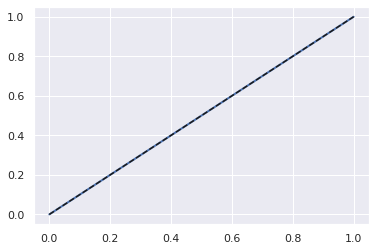

AUC Score:  0.5


In [64]:
y_scores = cross_val_predict(pipe, x_train, y_train, cv=3,method="predict")

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

plot_roc_curve(fpr, tpr)
plt.show()

print("AUC Score: ", roc_auc_score(y_train, y_scores))


#### This model has the performance least of all the above-trained models. 


## XGBoost

#### Training XGBoost

In [65]:
from xgboost import XGBClassifier

XGB_Classifier = XGBClassifier()
pipe = Pipeline([('label', col_trans), ('pca', pca),("XGB_Classifier", XGB_Classifier)])
pipe.fit(x_train, y_train)

[09:51:34] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1614190077837/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('label',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['relevent_experience',
                                                   'enrolled_university',
                                                   'education_level'])])),
                ('pca', PCA(n_components='mle', svd_solver='full')),
                ('XGB_Classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytre...gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, mi

#### Evaluating the model by calculating the training score and confusion matrix. 

In [66]:
print("train score: ", pipe.score(x_train, y_train))
y_pred  = pipe.predict(x_train)
print("-------------------")

print(confusion_matrix(y_train, y_pred))

train score:  0.8672588206266962
-------------------
[[11415   802]
 [ 1350  2645]]


#### Performing Cross-validation and evaluating the model. 

In [67]:
accuracies = cross_val_score(estimator = pipe, X = x_train, y = y_train, cv = 5);
print("Accuracy: {:.2f} %".format(accuracies.mean()*100));
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100));

[09:51:35] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1614190077837/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:51:36] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1614190077837/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:51:37] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1614190077837/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:51:38] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_161419007783

#### Plotting ROC curve and calculating AUC.


[09:51:39] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1614190077837/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:51:40] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1614190077837/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:51:41] WARNING: /opt/conda/envs/rapids/conda-bld/xgboost_1614190077837/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


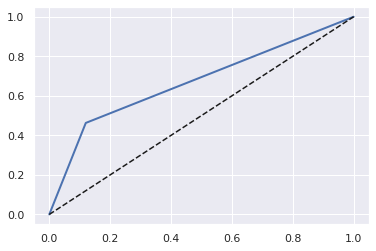

AUC Score:  0.6714568314756219


In [68]:
y_scores = cross_val_predict(pipe, x_train, y_train, cv=3,method="predict");

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores);
fpr, tpr, thresholds = roc_curve(y_train, y_scores);

plot_roc_curve(fpr, tpr);
plt.show()

print("AUC Score: ", roc_auc_score(y_train, y_scores));

#### No matter what classification algorithm we use; bagging or boosting method, the performance remains poor.

#### Thus we try to manipulate the data.

During our exploratory analysis, we observed that "city_development_index" in the 3D scatter plot appeared to be in groups. Thus now we perform the following steps. 

* First, we use unsupervised learning (k-means) to cluster the data into four groups. 
* Second, As of now, we saw that Random Forest was the better performer. So we use RandomForest to train the model, and then we see the results. 

Before performing the above steps, we append a column in the dataframe. This column contains the probability of the target being 1 or 0 for every Citi development index. 

Thus we try to use random forest on top of k-means to achieve better results. 


In [69]:

warnings.filterwarnings('ignore')
x_train["city_development_index_new"] = 0

for i in range(len(calculations_city)):
    x_train.city_development_index_new[(data.target == calculations_city.iloc[i, 0]) & 
                                    (x_train.city_development_index == calculations_city.iloc[i, 1])] = calculations_city.iloc[i, 2];
    
x_train.head()

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,city_development_index_new
10543,0.887,Has relevent experience,no_enrollment,Graduate,13,29.5,1,23.552124
9062,0.794,Has relevent experience,no_enrollment,Graduate,13,29.5,1,86.746988
9258,0.924,Has relevent experience,no_enrollment,Masters,9,300.0,4,91.289199
5101,0.926,Has relevent experience,no_enrollment,Graduate,9,29.5,3,89.952153
6337,0.939,No relevent experience,no_enrollment,Graduate,20,7499.5,1,90.794979


#### Training K-Means cluster.


In [70]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(x_train.loc[:, ["city_development_index","city_development_index_new"]] )

#### Plotting the clusters. 


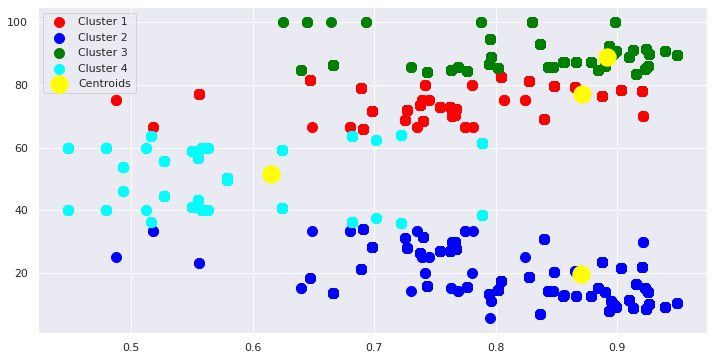

In [71]:
plt.figure(figsize=(12, 6))

X = x_train[["city_development_index","city_development_index_new"]].values
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

In [72]:
x_train["y_kmeans"] = y_kmeans
x_train = x_train[['city_development_index', 'relevent_experience', 'enrolled_university',
       'education_level', 'experience', 'company_size', 'last_new_job', 'y_kmeans']]

#### Training RandomForest Classifier on new training set.


In [73]:
pipe = Pipeline([('label', col_trans), ('pca', pca),("rf", random_forest)])

pipe.fit(x_train,y_train)

Pipeline(steps=[('label',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['relevent_experience',
                                                   'enrolled_university',
                                                   'education_level'])])),
                ('pca', PCA(n_components='mle', svd_solver='full')),
                ('rf', RandomForestClassifier(n_estimators=50))])

#### Evaluating the model by calculating the training score and confusion matrix. 

In [74]:
print("train score: ", pipe.score(x_train, y_train))
y_pred  = pipe.predict(x_train)
print("-------------------")

print(confusion_matrix(y_train, y_pred))

train score:  0.9713175425610658
-------------------
[[11914   303]
 [  162  3833]]


#### Performing Cross-validation and evaluating the model. 

In [75]:
accuracies = cross_val_score(estimator = pipe, X = x_train, y = y_train, cv = 5);
print("Accuracy: {:.2f} %".format(accuracies.mean()*100));
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100));

Accuracy: 91.14 %
Standard Deviation: 0.52 %


#### Plotting ROC curve and calculating AUC.


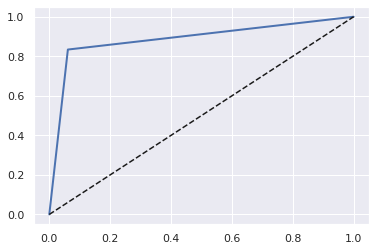

AUC Score:  0.8864900496169446


In [76]:
y_scores = cross_val_predict(pipe, x_train, y_train, cv=3,method="predict");

fpr, tpr, thresholds = roc_curve(y_train, y_scores);

plot_roc_curve(fpr, tpr);
plt.show()

print("AUC Score: ", roc_auc_score(y_train, y_scores));

#### Now we can see that the Area under the curve has increased significantly. Moreover, the ROC curve even looks generalizing a large part of the dataset. 

#### The standard deviation is less than 0.5%, with an accuracy greater than 90%. Thus we have a model with low bias and low variance. 

#### Before we use this model on the test set, let us first tune the hyperparameters using  Grid Search. 

In [77]:
random_forest = RandomForestClassifier()
one = OneHotEncoder()
col_trans = make_column_transformer((one, ["relevent_experience","enrolled_university", "education_level"]),
                                   remainder = "passthrough")


pca = PCA()

#### Using grid search to fine-tune the model.


In [78]:
pipe = Pipeline([('label', col_trans), ('pca', pca),("rf", random_forest)])

params = {
    'pca__n_components': [2,3,4,5,6,7,8],
    'rf__n_estimators': [50,100,150,200,250,300]
    
}

grid_search = GridSearchCV(estimator = pipe,
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('label',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['relevent_experience',
                                                                          'enrolled_university',
                                                                          'education_level'])])),
                                       ('pca', PCA()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [2, 3, 4, 5, 6, 7, 8],
                         'rf__n_estimators': [50, 100, 150, 200, 250, 300]},
             scoring='accuracy')

#### Printing best score

In [79]:
grid_search.best_score_

0.9122871946706144

#### Printing best combinations of parameters


In [80]:
grid_search.best_params_

{'pca__n_components': 4, 'rf__n_estimators': 50}

#### Thus,  Training the model on train data one last time with the combination of best parameters. 


In [81]:
random_forest = RandomForestClassifier(n_estimators = 250)
one = OneHotEncoder()
col_trans = make_column_transformer((one, ["relevent_experience","enrolled_university", "education_level"]),
                                   remainder = "passthrough")


pca = PCA(n_components = 6)

pipe = Pipeline([('label', col_trans), ('pca', pca),("rf", random_forest)])
pipe.fit(x_train, y_train)

Pipeline(steps=[('label',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['relevent_experience',
                                                   'enrolled_university',
                                                   'education_level'])])),
                ('pca', PCA(n_components=6)),
                ('rf', RandomForestClassifier(n_estimators=250))])

#### Final Evaluating the model by calculating the training score and confusion matrix

In [82]:
print("train score: ", pipe.score(x_train, y_train))
y_pred  = pipe.predict(x_train)
print("-------------------")

print(confusion_matrix(y_train, y_pred))

train score:  0.9713792252652357
-------------------
[[11916   301]
 [  163  3832]]


#### performing Cross-validation and evaluating the model. 

In [83]:
accuracies = cross_val_score(estimator = pipe, X = x_train, y = y_train, cv = 10);
print("Accuracy: {:.2f} %".format(accuracies.mean()*100));
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100));

Accuracy: 91.03 %
Standard Deviation: 0.63 %


#### Plotting ROC curve and calculating AUC.


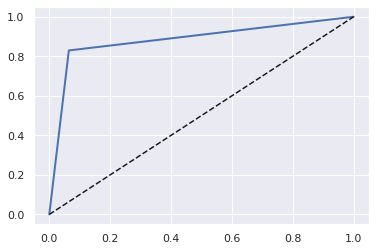

AUC Score:  0.8826410970658564


In [84]:
y_scores = cross_val_predict(pipe, x_train, y_train, cv=3,method="predict");

precisions, recalls, thresholds = roc_curve(y_train, y_scores);
fpr, tpr, thresholds = roc_curve(y_train, y_scores);

plot_roc_curve(fpr, tpr);
plt.show()

print("AUC Score: ", roc_auc_score(y_train, y_scores));

### Predicting the results on the test dataset

In [85]:
x_test["y_kmeans"] = 0
warnings.filterwarnings('ignore')
x_test["city_development_index_new"] = 0

for i in range(len(calculations_city)):
    x_test.city_development_index_new[(data.target == calculations_city.iloc[i, 0]) & 
                                    (x_test.city_development_index == calculations_city.iloc[i, 1])] = calculations_city.iloc[i, 2];
    
x_test["y_kmeans"] = kmeans.predict(x_test.loc[:, ["city_development_index","city_development_index_new"]] )
x_test = x_test.drop("city_development_index_new", axis = "columns")

In [86]:
from sklearn.metrics import accuracy_score

y_pred  = pipe.predict(x_test)

print("Accuracy is: ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy is:  0.913984461709212
[[1288   88]
 [  67  359]]


### Thus we have successfully developed an ML model to classify whether the person taking the course is looking for a new job or not. The model has an accuracy rate of more than 90% with no overfitting. 

#### Saving model using pickle

In [87]:

import pickle

with open("model_ensamble.pkl", 'wb') as file:  
    pickle.dump(pipe, file)
    

#### Although we have achieved promising results using our ensemble machine learning model. I was pretty curious to use AutoML and see if we can achieve promising results. 

#### The autoML framework we use for this use case is Keras auto. The Keras uses TensorFlow GPU. The TensorFlow GPU is used to ake advantage of the multicores available in GPU to accelerate the training process.

#### AutoML with Keras is very straight forward we just split the data into training and testing sets. Rest everything is taken care by the framework itself.

## AutoML using Keras

In [88]:
import tensorflow as tf

import autokeras as ak

#### Splitting the data into training and testing sets. 

In [89]:
data_1= pd.read_csv("aug_data.csv")

x_data = data_1.iloc[:, :-1].values
y_data = data_1.iloc[:, -1].values
x_train, x_test, y_train, y_test =  train_test_split(x_data, y_data, train_size = 0.90, random_state = 0)

#### Fitting the model on the training set using cross validation. 

In [90]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
cvscores = []

for train, test in kfold.split(x_train, y_train):
    
    clf = ak.StructuredDataClassifier(overwrite=True, max_trials=3)
    
    clf.fit(x_train[train], y_train[train], epochs=30)
    
    scores = clf.evaluate(x_train[test], y_train[test], verbose=0)
    cvscores.append(scores[1] * 100)


Trial 3 Complete [00h 00m 33s]
val_accuracy: 0.7612988352775574

Best val_accuracy So Far: 0.7639315724372864
Total elapsed time: 00h 01m 16s
INFO:tensorflow:Oracle triggered exit
Epoch 1/30
360/360 [==============================] - 1s 3ms/step - loss: 0.6054 - accuracy: 0.6837
Epoch 2/30
360/360 [==============================] - 1s 3ms/step - loss: 0.5327 - accuracy: 0.7526
Epoch 3/30
360/360 [==============================] - 1s 3ms/step - loss: 0.5271 - accuracy: 0.7560
Epoch 4/30
360/360 [==============================] - 1s 3ms/step - loss: 0.5239 - accuracy: 0.7562
Epoch 5/30
360/360 [==============================] - 1s 3ms/step - loss: 0.5213 - accuracy: 0.7568
Epoch 6/30
360/360 [==============================] - 1s 3ms/step - loss: 0.5192 - accuracy: 0.7587
Epoch 7/30
360/360 [==============================] - 1s 3ms/step - loss: 0.5175 - accuracy: 0.7600
Epoch 8/30
360/360 [==============================] - 1s 3ms/step - loss: 0.5161 - accuracy: 0.7597
Epoch 9/30
360/360 [

#### Printing means value standard deviation of the accuracies calculated during cross-validation.  

In [91]:
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

75.68% (+/- 0.30%)


#### Plotting the ROC and calculate the AUC value. 

In [92]:
warnings.filterwarnings('ignore')

# Evaluate the best model with testing data.

predicted_y = clf.predict(x_train)
fpr, tpr, thresholds = roc_curve(y_train, predicted_y);
print(clf.evaluate(x_train, y_train))


539/539 [==============================] - 1s 2ms/step - loss: 0.4952 - accuracy: 0.7714
[0.4952223002910614, 0.7713722586631775]


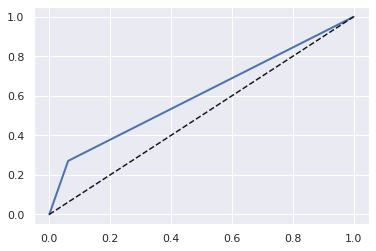

AUC Score:  0.6043985353353181


In [93]:
plot_roc_curve(fpr, tpr);
plt.show()

print("AUC Score: ", roc_auc_score(y_train, predicted_y));


#### As the model built with the combination of K-means and Random Forest has better performance than the model built with Keras. We can consider that as the final model.

## Conclusion

We have completed the task of classifying whether the person taking the course is finding a new job or not.  The use of CuDF from rapids is used to accelerate various operations' performed on the dataframe using the GPU's processing power. Once the preprocessing is completed, we perform the exploratory data analysis to explore the relationship between various features in the data.

The final model designed by combining K-means clustering and Random Forest Classier has more than **90% accuracy**. This model even has low bias and low variance, indicating it is not over neither under fitted.
The demonstration using Keras auto has been also achieved. Auto ML being a powerful platform, can be used as a tool in large machine learning projects. 

## References

Anon., n.d. Welcome to cuDF’s documentation!. [Online] 
Available at: https://docs.rapids.ai/api/cudf/stable/#welcome-to-cudf-s-documentation
[Accessed 2021].

Bruce, P., Bruce, A. & Gedeck, . P., 2020. Practical Statistics for Data Scientists. 2 edition ed. s.l.:O'Reilly.

Géron, A., 2019. Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow. In: N. Tache, ed. Sebastopol: O’Reilly Media.

AutoKeras [WWW Document], n.d. URL https://autokeras.com/ (accessed 3.13.21).

Möbius, 2021. HR Analytics: Job Change of Data Scientists. [Online] 
Available at: https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists



## GitHub Link: 

https://rajas-bakshi.github.io/HR_Analysis/